# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Samuel Anderson
- **Email:** muelson520@gmail.com
- **ID Dicoding:** samuel_anderson_DGQp

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
    * Jenis produk apa yang paling sering diorder dan jarang diorder pada E-commerce?
- Pertanyaan 
    * Bagaimana peforma E-commerce itu?

## Import Semua Packages/Library yang Digunakan

In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import streamlit as st

## Data Wrangling

### Gathering Data

Melihat current directory

In [337]:
current_dir = os.getcwd()

**Memuat tabel sellers**

In [338]:
sellers_df = pd.read_csv(os.path.join(current_dir,"data/sellers_dataset.csv"))

In [339]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Memuat tabel order items**

In [340]:
order_items_dataset_df = pd.read_csv(os.path.join(current_dir,"data/order_items_dataset.csv"))
order_items_dataset_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Memuat tabel products_dataset**

In [341]:
products_dataset_df = pd.read_csv(os.path.join(current_dir,"data/products_dataset.csv"))
products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Memuat data products_category_translate_df**

In [342]:
products_category_name_translation_df = pd.read_csv(os.path.join(current_dir,"data/product_category_name_translation.csv"))
products_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Memuat data customers_dataset_df**

In [343]:
customers_dataset_df = pd.read_csv(os.path.join(current_dir,"data/customers_dataset.csv"))
customers_dataset_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Memuat data geolocation_df**

In [344]:
geolocation_df = pd.read_csv(os.path.join(current_dir,"data/geolocation_dataset.csv"))

In [345]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Memuat order_payments_df**

In [346]:
order_payments_df = pd.read_csv(os.path.join(current_dir,"data/order_payments_dataset.csv"))
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Memuat order_reviews_df**

In [347]:
order_reviews_df = pd.read_csv(os.path.join(current_dir,"data/order_reviews_dataset.csv"))
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Memuat orders_df**

In [348]:
orders_df = pd.read_csv(os.path.join(current_dir,"data/orders_dataset.csv"))
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- Mengetahui tabel tabel yang akan digunakan beserta kolom-kolomnya untuk dilakukan penilaian data

### Assessing Data

#### Menilai data sellers_df

Melihat data type sellers_df

In [349]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Menilai apakah ada duplikat

In [350]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


Melihat apakah di sellers_df ada yang kosong

In [351]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Lihat parameter statistik dengan describe

In [352]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


#### Menilai data order items

Melihat datatype order_items_dataset_df

In [353]:
order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Menilai apakah ada duplikat

In [354]:
print("Jumlah duplikasi: ", order_items_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


Melihat apakah ada yang kosong di order_items_dataset_df

In [355]:
order_items_dataset_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Lihat parameter statistik dengan describe

In [356]:
order_items_dataset_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


#### Menilai data products_dataset_df

Melihat datatype products_dataset_df

In [357]:
products_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Menilai apakah ada duplikat

In [358]:
print("Jumlah duplikasi: ", products_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


Melihat data apa saja yang kosong

In [359]:
products_dataset_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Lihat parameter statistik dengan describe

In [360]:
products_dataset_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


#### Menilai data products_category_translate_df

Melihat info datatype

In [361]:
products_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Melihat duplikasi

In [362]:
products_category_name_translation_df.duplicated().sum()

np.int64(0)

Melihat parameter statistik

In [363]:
products_category_name_translation_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menilai dataset customers_dataset_df

In [364]:
customers_dataset_df.info() # Melihat info yang ada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [365]:
customers_dataset_df.isna().sum() # Melihat missing value

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [366]:
customers_dataset_df.duplicated().sum() # Melihat apakah ada duplikasi

np.int64(0)

In [367]:
customers_dataset_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


#### Menilai dataset geolocation_df

In [368]:
geolocation_df.info() # Melihat info geolocation_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [369]:
geolocation_df.isna().sum() # Melihat apakah ada kosong

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [370]:
geolocation_df.duplicated().sum() # Melihat apakah ada duplikasi

np.int64(261831)

In [371]:
geolocation_df.describe(include="all") # Melihat deskripsi geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


#### Menilai order_payments_df

In [372]:
order_payments_df.info() # Melihat info yang ada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [373]:
order_payments_df.isna().sum() # Melihat apakah ada data yang kosong

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [374]:
order_payments_df.duplicated().sum() # Melihat apakah ada data duplikat

np.int64(0)

In [375]:
order_payments_df.describe(include="all") # Melihat deskripsi order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


#### Melihat dataset order_reviews_df

In [376]:
order_reviews_df.info() # Melihat info order_reviews_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [377]:
order_reviews_df.isna().sum() # Melihat order_reviews_df apakah ada yang kosong

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [378]:
order_reviews_df.duplicated().sum() # Melihat apakah ada duplikasi

np.int64(0)

In [379]:
order_reviews_df.describe(include="all") # Melihat deskripsi order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


#### Melihat orders_df

In [380]:
orders_df.info() # Melihat info orders_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [381]:
orders_df.isna().sum() # Melihat kekosongan

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [382]:
orders_df.duplicated().sum() # Melihat duplikasi

np.int64(0)

**Insight:**
- sellers_df column name seller_zip_code_prefix harusnya tidak int karena itu mirip seperti kode khusus pos
- order_items_dataset_df pada bagian column shipping_limit_date seharusnya datetime
- adanya banyak kekosongan pada dataset products_dataset_df di product_category_name, product_name_lenght, product_description_lenght, product_photos_qty serta sedikit kekosongan pada product_weight_g, product_length_cm, product_height_cm, product_width_cm
- data products_category_name_translation_df sudah siap untuk digunakan, tidak perlu pembersihan
- data customers_dataset_df pada kolom customer_zip_code_prefix harusnya tidak int karena itu mirip seperti kode khusus pos
- data geolocation_df pada kolom geolocation_zip_code_prefix harusnya tidak int karena itu mirip seperti kode khusus pos dan juga ada duplikasi di dalamnya
- data order_payments_df sudah siap untuk digunakan, tidak perlu pembersihan
- data order_reviews_df ada kekosongan didalamnya, namun sebaiknya dibiarkan karena tidak semua orang mereview barang
- data orders_df bagian order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date perlu diganti tipe datanya menjadi datetime dan juga adanya kekosongan di beberapa data

### Cleaning Data

#### Membersihkan data sellers_df

Mengubah column jenis int pada seller_zip_code_prefix

In [383]:
sellers_df["seller_zip_code_prefix"] = sellers_df["seller_zip_code_prefix"].astype(str)

In [384]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


#### Membersihkan order_items_dataset_df

Mengubah jenis data kolom shipping_limit_date menjadi datetime

In [385]:
order_items_dataset_df["shipping_limit_date"] = pd.to_datetime(order_items_dataset_df["shipping_limit_date"])
order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Membersihkan products_dataset 

Lihat missing value 

In [386]:
 products_dataset_df[products_dataset_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Melakukan imputation untuk product category_name

In [387]:
 products_dataset_df.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [388]:
products_dataset_df["product_category_name"].fillna(value="cama_mesa_banho", inplace=True)

C:\Users\S\AppData\Local\Temp\ipykernel_7304\1951620046.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_dataset_df["product_category_name"].fillna(value="cama_mesa_banho", inplace=True)


Melihat nama kategori produk yang sudah diisi beserta keterangannya

In [389]:
see_fill_product=products_dataset_df.loc[products_dataset_df["product_category_name"]=="cama_mesa_banho"]
see_fill_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
10,14aa47b7fe5c25522b47b4b29c98dcb9,cama_mesa_banho,54.0,630.0,1.0,1100.0,16.0,10.0,16.0
19,f53103a77d9cf245e579ea37e5ec51f0,cama_mesa_banho,52.0,206.0,1.0,500.0,16.0,10.0,16.0
21,518ef5de2c2b3a255e326a4594ba15d9,cama_mesa_banho,27.0,329.0,2.0,800.0,36.0,8.0,16.0
30,47859fca9dd7485cbd93c3e8993bb74f,cama_mesa_banho,45.0,206.0,1.0,650.0,16.0,10.0,16.0
42,db46052aed7dff59ba38cf2fe29b87f9,cama_mesa_banho,56.0,509.0,4.0,6350.0,45.0,15.0,35.0


Mengisi keterangan panjang nama, panjang deskripsi, dan kualitas foto yang masih kosong dengan mean

In [390]:
products_dataset_df.product_name_lenght.fillna(value=round(products_dataset_df["product_name_lenght"].mean()), inplace=True)
products_dataset_df.product_description_lenght.fillna(value=round(products_dataset_df["product_description_lenght"].mean()), inplace=True)
products_dataset_df.product_photos_qty.fillna(value=round(products_dataset_df["product_photos_qty"].mean()), inplace=True)

C:\Users\S\AppData\Local\Temp\ipykernel_7304\204875096.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_dataset_df.product_name_lenght.fillna(value=round(products_dataset_df["product_name_lenght"].mean()), inplace=True)
C:\Users\S\AppData\Local\Temp\ipykernel_7304\204875096.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [391]:
products_dataset_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              2
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

#### Membersihkan customers_dataset_df pada kolom customer_zip_code_prefix 

In [392]:
customers_dataset_df["customer_zip_code_prefix"]=customers_dataset_df["customer_zip_code_prefix"].astype(str)

In [393]:
customers_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


#### Membersihkan geolocation_df pada kolom geolocation_zip_code_prefix dan juga duplikasi di dalamnya

In [394]:
geolocation_df["geolocation_zip_code_prefix"]=geolocation_df["geolocation_zip_code_prefix"].astype(str) # Mengubah tipe data jadi str

In [395]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB


In [396]:
geolocation_df.duplicated().sum() # Total duplikat

np.int64(261831)

In [397]:
geolocation_df.drop_duplicates(inplace=True)

In [398]:
geolocation_df.duplicated().sum()

np.int64(0)

#### Membersihkan orders_df bagian order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date perlu diganti tipe datanya menjadi datetime 

In [399]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [400]:
tmp = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for i in tmp:
    orders_df[i] = pd.to_datetime(orders_df[i])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Insight:**
Data sudah siap dieksplorasi dengan list sebagai berikut:
- sellers_df
- order_items_dataset_df
- products_dataset_df
- products_category_name_translation_df
- customers_dataset_df
- geolocation_df
- order_payments_df
- order_reviews_df
- orders_df

## Exploratory Data Analysis (EDA)

### Explore ...

#### Melakukan Penggabungan data all_orders_df

Melakukan penggabungan dari order_items_dataset_df dan order_payments_df

In [401]:
orders_items_payment_df = pd.merge(
    left=order_items_dataset_df,
    right=order_payments_df,
    how="outer",
    left_on="order_id",
    right_on="order_id"
)

Melakukan penggabungan dari order_df dan order_reviews_df

In [402]:
orders_reviews_df = pd.merge(
    left=orders_df,
    right=order_reviews_df,
    how="outer",
    left_on="order_id",
    right_on="order_id"
)

Penggabungan semua order

In [403]:
all_orders_df = pd.merge(
    left=orders_items_payment_df,
    right=orders_reviews_df,
    how="outer",
    left_on="order_id",
    right_on="order_id"
)
all_orders_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [404]:
all_orders_df.duplicated().sum()

np.int64(0)

#### Penggabungan products_dataset_df dan products_category_name_translation_df

In [405]:
all_products_df = pd.merge(
    left=products_dataset_df,
    right=products_category_name_translation_df,
    how="outer",
    left_on="product_category_name",
    right_on="product_category_name"
)
all_products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,07f01b6fcacc1b187a71e5074199db2d,agro_industria_e_comercio,39.0,430.0,1.0,16400.0,63.0,66.0,56.0,agro_industry_and_commerce
1,613d093272cb8f74f25a01e430155a6a,agro_industria_e_comercio,39.0,326.0,1.0,1050.0,38.0,41.0,39.0,agro_industry_and_commerce
2,980ecbcc15fe174ec1e5757c4d75b1bf,agro_industria_e_comercio,48.0,157.0,1.0,250.0,17.0,3.0,10.0,agro_industry_and_commerce
3,ba1d7e7ee1f055d252a2faa8ea3cea9b,agro_industria_e_comercio,59.0,693.0,6.0,1900.0,45.0,15.0,40.0,agro_industry_and_commerce
4,137ace556a03792cdc43f91ec621426d,agro_industria_e_comercio,48.0,1268.0,1.0,550.0,16.0,19.0,11.0,agro_industry_and_commerce


In [406]:
all_products_df.duplicated().sum()

np.int64(0)

#### Penggabungan all_orders_df dan all_products_df

In [407]:
all_orders_products_df = pd.merge(
    left=all_orders_df,
    right=all_products_df,
    how="outer",
    left_on="product_id",
    right_on="product_id"
)

In [408]:
all_orders_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,f30149f4a8882a08895b6a242aa0d612,1.0,00066f42aeeb9f3007548bb9d3f33c38,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59,1.0,credit_card,3.0,...,2018-06-08 10:59:20,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0,perfumery
1,f5eda0ded77c1293b04c953138c8331d,1.0,00088930e925c41fd95ebfe695fd2655,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93,1.0,credit_card,1.0,...,2017-12-27 13:23:27,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0,auto
2,0bf736fd0fd5169d60de3699fcbcf986,1.0,0009406fd7479715e4bef61dd91f2462,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10,1.0,credit_card,10.0,...,2018-01-11 11:03:53,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0,bed_bath_table
3,3aba44d8e554ab4bb8c09f6f78032ca8,1.0,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60,1.0,credit_card,4.0,...,2018-08-22 12:40:29,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0,housewares
4,6f0dfb5b5398b271cc6bbd9ee263530e,1.0,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60,1.0,credit_card,1.0,...,2018-08-08 23:48:48,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0,housewares


In [409]:
all_orders_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   order_item_id                  118310 non-null  float64       
 2   product_id                     118310 non-null  object        
 3   seller_id                      118310 non-null  object        
 4   shipping_limit_date            118310 non-null  datetime64[ns]
 5   price                          118310 non-null  float64       
 6   freight_value                  118310 non-null  float64       
 7   payment_sequential             119140 non-null  float64       
 8   payment_type                   119140 non-null  object        
 9   payment_installments           119140 non-null  float64       
 10  payment_value                  119140 non-null  float64       
 11  

#### Penggabungan sellers_df dan customers_dataset_df ke all_orders_products_df (all_df)

Rename state dan city

In [410]:
sellers_df.rename(columns={"seller_city":"city", "seller_state":"state"}, inplace=True)
customers_dataset_df.rename(columns={"customer_city":"city", "customer_state":"state"}, inplace=True)

In [411]:
sellers_customers_df=pd.merge(
    left=sellers_df,
    right=customers_dataset_df,
    how="outer"
)
sellers_customers_df.head()

,seller_id,seller_zip_code_prefix,city,state,customer_id,customer_unique_id,customer_zip_code_prefix
0,ceb7b4fb9401cd378de7886317ad1b47,22790,04482255,RJ,NaN,NaN,NaN
1,c8143b3069f6746a77421b5ce30a450c,75345,abadia de goias,GO,NaN,NaN,NaN
2,NaN,NaN,abadia dos dourados,MG,f11eb8f0b8b87510a93e3e1aa10b0ade,64ee476500a01beb94df40f97a108c50,38540
3,NaN,NaN,abadia dos dourados,MG,a23e3f9a2b656b23b7e52075964b42cd,afddf43a03a9941624ed42c0b2c17280,38540
4,NaN,NaN,abadia dos dourados,MG,9e01f714a2b3b8962c222cf2b74c20dc,e1feae9083c4c2895ddf6dc80526a85d,38540


In [412]:
all_df = pd.merge(
    left=all_orders_products_df,
    right=sellers_customers_df,
    how="left"
)

#### Informasi all_df

In [413]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   order_item_id                  118310 non-null  float64       
 2   product_id                     118310 non-null  object        
 3   seller_id                      118310 non-null  object        
 4   shipping_limit_date            118310 non-null  datetime64[ns]
 5   price                          118310 non-null  float64       
 6   freight_value                  118310 non-null  float64       
 7   payment_sequential             119140 non-null  float64       
 8   payment_type                   119140 non-null  object        
 9   payment_installments           119140 non-null  float64       
 10  payment_value                  119140 non-null  float64       
 11  

In [414]:
all_df.to_csv("all_data.csv")

**Insight:**
- Penggabungan keempat matriks untuk memudahkan kita melakukan visualisasi dan analisis

## Visualization & Explanatory Analysis

### Pertanyaan 1:

#### Jenis produk apa yang paling sering diorder pada E-commerce?

In [415]:
sum_orders_category_df = all_df.groupby(by="product_category_name_english").agg({
    "product_category_name_english": "count",
})
sum_orders_category_df.rename(columns={"product_category_name_english":"quantity"}, inplace=True)
sum_orders_category_df.sort_values(by="quantity",ascending=False).head()

,quantity
product_category_name_english,
bed_bath_table,13697
health_beauty,10032
sports_leisure,9004
furniture_decor,8832
computers_accessories,8150


C:\Users\S\AppData\Local\Temp\ipykernel_7304\500697474.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity", y="product_category_name_english", data=sum_orders_category_df.sort_values(by="quantity", ascending=False).head(5), palette=colors, ax=ax[0])
C:\Users\S\AppData\Local\Temp\ipykernel_7304\500697474.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity", y="product_category_name_english", data=sum_orders_category_df.sort_values(by="quantity", ascending=True).head(5), palette=colors, ax=ax[1])


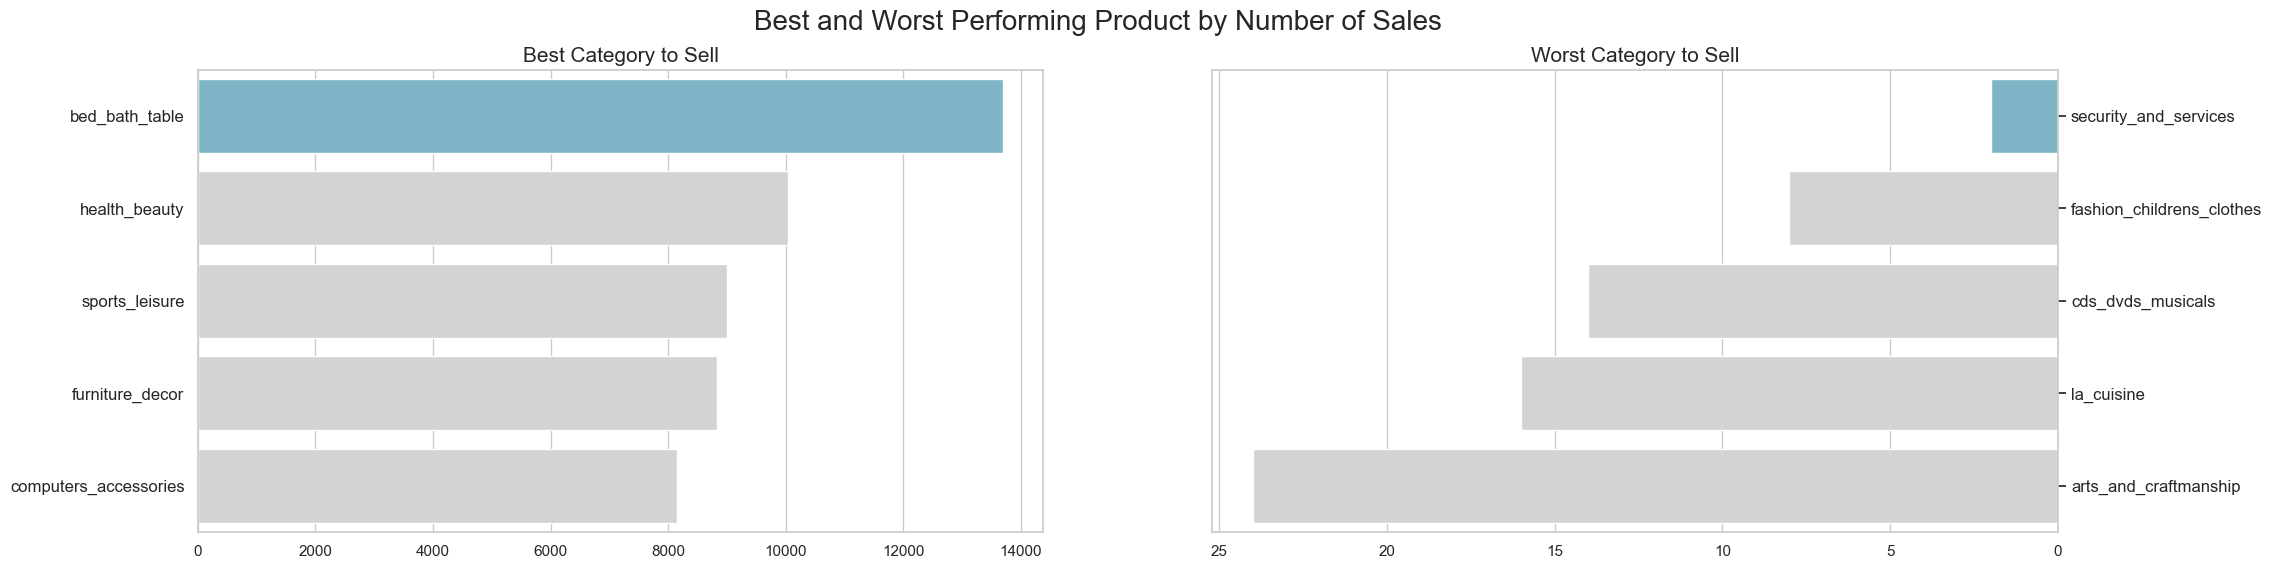

In [416]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="quantity", y="product_category_name_english", data=sum_orders_category_df.sort_values(by="quantity", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Category to Sell", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="quantity", y="product_category_name_english", data=sum_orders_category_df.sort_values(by="quantity", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Category to Sell", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### Pertanyaan 2:

#### Bagaimana peforma E-commerce itu dari tahun ke tahun?

Melihat statistik jumlah order dan revenue

In [417]:
yearly_transaction_happen_df = all_df.resample(rule='Y', on='order_delivered_customer_date').agg({
    "order_id": "nunique",
    "price": "sum"
})
yearly_transaction_happen_df.index = yearly_transaction_happen_df.index.strftime('%Y')
yearly_transaction_happen_df = yearly_transaction_happen_df.reset_index()
yearly_transaction_happen_df.rename(columns={
    "order_delivered_customer_date": "month",
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
yearly_transaction_happen_df.head()

C:\Users\S\AppData\Local\Temp\ipykernel_7304\726650957.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_transaction_happen_df = all_df.resample(rule='Y', on='order_delivered_customer_date').agg({


,month,order_count,revenue
0,2016,272,42568.53
1,2017,40930,5946138.24
2,2018,55274,7887161.96


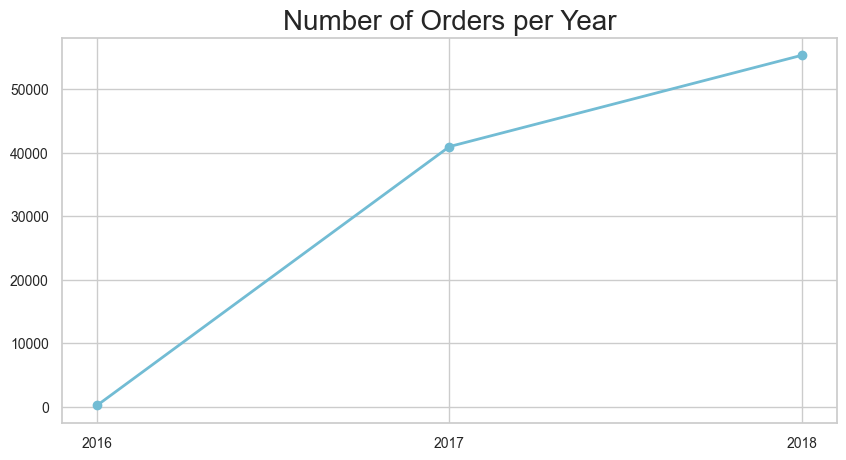

In [418]:
plt.figure(figsize=(10, 5)) 
plt.plot(yearly_transaction_happen_df["month"], yearly_transaction_happen_df["order_count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Orders per Year", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

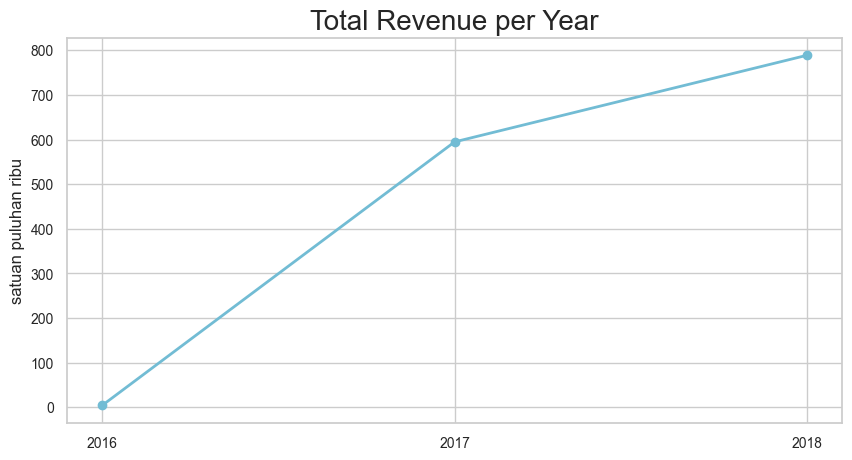

In [419]:
plt.figure(figsize=(10, 5))
plt.plot(
    yearly_transaction_happen_df["month"],
    yearly_transaction_happen_df["revenue"]/10000,
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Year", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("satuan puluhan ribu")
plt.show()

Melihat sumber orderan terbanyak di e-commerce berdasarkan languange code

In [420]:
order_by_state_df = all_df.groupby(by="state").agg({
    "order_id": "count"
})
order_by_state_df = order_by_state_df.reset_index()
most_order_df=order_by_state_df.sort_values(by="order_id", ascending=False).head(5)
most_order_df

,state,order_id
20,SP,5268
15,RJ,356
7,MG,210
14,PR,176
3,DF,60


([<matplotlib.patches.Wedge at 0x2c3ee7956d0>,
 [Text(-1.0065908897118858, 0.44359303505469355, 'SP'),
  Text(0.8784040487608961, -0.6621225922142103, 'RJ'),
  Text(1.0321830250349826, -0.3802607037673397, 'MG'),
  Text(1.087117000105625, -0.16785895293771777, 'PR'),
  Text(1.0994696711952534, -0.03415321539477239, 'DF')],
 [Text(-0.5490495762064831, 0.2419598373025601, '86.8%'),
  Text(0.4791294811423069, -0.36115777757138745, '5.9%'),
  Text(0.5630089227463541, -0.20741492932763983, '3.5%'),
  Text(0.5929729091485226, -0.09155942887511877, '2.9%'),
  Text(0.5997107297428654, -0.018629026578966753, '1.0%')])

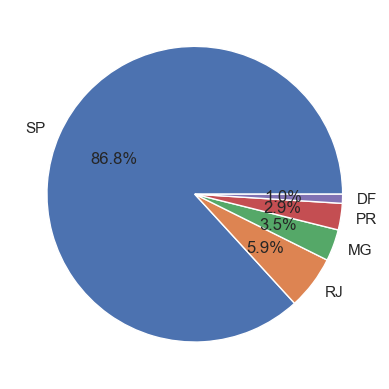

In [421]:
fig, ax = plt.subplots()
ax.pie(most_order_df["order_id"], labels=most_order_df["state"], autopct='%1.1f%%')

Melihat kota dengan order terbanyak

In [422]:
order_by_city_df = all_df.groupby(by="city").agg({
    "order_id": "count"
})
order_by_city_df = order_by_city_df.reset_index()
most_order_city_df=order_by_city_df.sort_values(by="order_id", ascending=False).head(5)
most_order_city_df

,city,order_id
194,sao paulo,4997
165,rio de janeiro,339
22,belo horizonte,155
64,curitiba,131
31,brasilia,60


([<matplotlib.patches.Wedge at 0x2c3cb61e360>,
 [Text(-1.0220451658130651, 0.4067230987270634, 'sao paulo'),
  Text(0.9260658824384139, -0.5936345520465953, 'rio de janeiro'),
  Text(1.0518701707915261, -0.32182160244304003, 'belo horizonte'),
  Text(1.0894243510699035, -0.15216630144654042, 'curitiba'),
  Text(1.099394777651557, -0.036484556629945465, 'brasilia')])

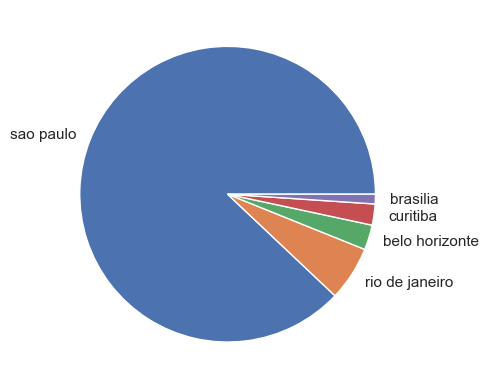

In [423]:
fig, ax = plt.subplots()
ax.pie(most_order_city_df["order_id"], labels=most_order_city_df["city"])

**Insight:**
- Didalam E-commerce produk yang paling laris adalah kategori bed_bath_table dan yang paling sedikit terjual adalah security_services
- Didapati bahwa order terus naik sampai tahun 2018. Dibutuhkan analisis lebih lanjut untuk melihat apakah e-commerce ini layak dimasuki pada tahun 2024, namun berdasarkan data maka masuk ke e-commerce akan sangat menguntungkan terutama bila perusahaan terletak di daerah brazil, sau paulo dengan official code languange SP

## Conclusion

- Conclution pertanyaan 1
   * Produk yang paling laris adalah kategori bed_bath_table dan yang paling sedikit terjual adalah security_services
- Conclution pertanyaan 2
   * Bila melihat hanya dari tahun yang ada, maka peforma e-commerce itu cukup baik dan layak untuk dimasuki terutama jika perusahaan terletak di brasil